- Task

    predict the output of a continuous value, like a price or a probability. 
    
- Datasets

    boston_housing

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/home/jasonhaven/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [2]:
boston_housing = keras.datasets.boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape[0]))
train_data = train_data[order]
train_labels = train_labels[order]

In [3]:
'''
This dataset is much smaller than the others we've worked with so far: it has 506 total examples are split between 404 training examples and 102 test examples:
'''

print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


The dataset contains 13 different features:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

In [4]:
a=[3,0,2,5]

In [5]:
np.argsort(a)

array([1, 2, 0, 3])

In [6]:
[a[i] for i in  np.argsort(a)]

[0, 2, 3, 5]

In [7]:
a=np.random.random(train_labels.shape)

In [8]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [9]:
# Labels

print(train_labels[:10])


[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [11]:
# Normalize features

'''
It's recommended to normalize features that use different scales and ranges. For each feature, subtract the mean of the feature and divide by the standard deviation
'''

# Test data is *not* used when calculating the mean and std.
print(train_data[0])

mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data-mean)/std
test_data=(test_data-mean)/std

print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]
[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [13]:
print(mean,len(mean))

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] 13


In [16]:
print(train_data.shape,type(train_data))

(404, 13) <class 'numpy.ndarray'>


In [17]:
# Create the model

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),#输入层
    keras.layers.Dense(64, activation=tf.nn.relu),#隐藏层
    keras.layers.Dense(1)#输出层
  ])

  model.compile(loss='mse',
                optimizer=tf.train.RMSPropOptimizer(0.001),
                metrics=['mae'])
  return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Train the model

# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,batch_size=32,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [33]:
model.evaluate(test_data,test_labels)

102/102 [==============================] - 0s 18us/step


[18.023687325271904, 2.625867058249081]

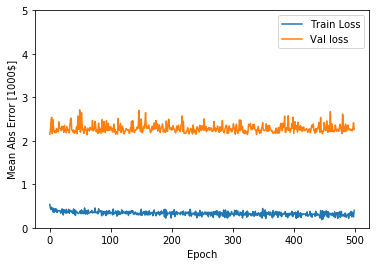

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)


....................................................................................................
................................................................................................

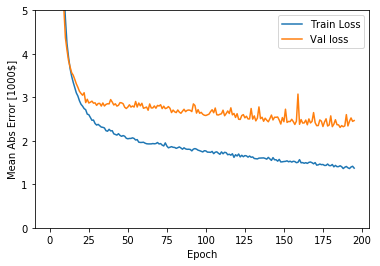

In [37]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [38]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2567.76


In [40]:
test_predictions = model.predict(test_data).flatten()
print(len(test_predictions),test_predictions)

102 [ 7.9816866 19.81267   22.183662  36.455246  26.1737    22.210018
 25.762682  22.326265  19.525976  22.207384  20.237612  17.125772
 16.15088   44.732136  19.682608  21.157152  27.174883  19.510332
 19.905489  25.833235   9.674325  14.354643  21.992012  15.012085
 20.723877  25.324696  29.906515  31.243979  10.985666  20.593332
 20.301022  15.177071  33.75799   25.664698  20.361263   7.9119406
 16.702196  15.839661  19.968447  25.870192  33.53677   29.67519
 13.939294  43.23729   31.123877  27.587107  28.831942  18.585007
 22.731577  22.85396   34.86172   19.599966   9.806241  16.056995
 36.40821   29.07953   12.412402  48.908768  34.436653  25.337496
 24.146818  16.204306  14.912837  19.771078  23.95878   21.37811
 14.087602  22.034887  12.078782   7.4946127 26.030237  30.054996
 26.422125  12.502786  26.03705   20.07805   20.096807  24.294842
 37.024345   9.619469  22.621664  38.49057   16.322218  14.046359
 18.341755  21.067154  19.953545  20.855494  22.191908  32.527824
 22.206

Conclusion
This notebook introduced a few techniques to handle a regression problem.


Mean Squared Error (MSE) is a common loss function used for regression problems (different than classification problems).

Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).

When input data features have values with different ranges, each feature should be scaled independently.

If there is not much training data, prefer a small network with few hidden layers to avoid overfitting.

Early stopping is a useful technique to prevent overfitting.

In [42]:
test_one=test_data[0]

model.predict

In [45]:
test_one.shape

(13,)

In [48]:
test_one=np.expand_dims(test_one,axis=0)

In [49]:
model.predict(test_one)

array([[7.981687]], dtype=float32)